<a href="https://colab.research.google.com/github/abdoufermat5/cryptographie--aes_des/blob/main/AES_DES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DES: Data Encryption Standard

Nous allons implémenter l'algorithme de chiffrement DES pour chiffré le poême **Femme Noire** de Leopold Sédar Senghor

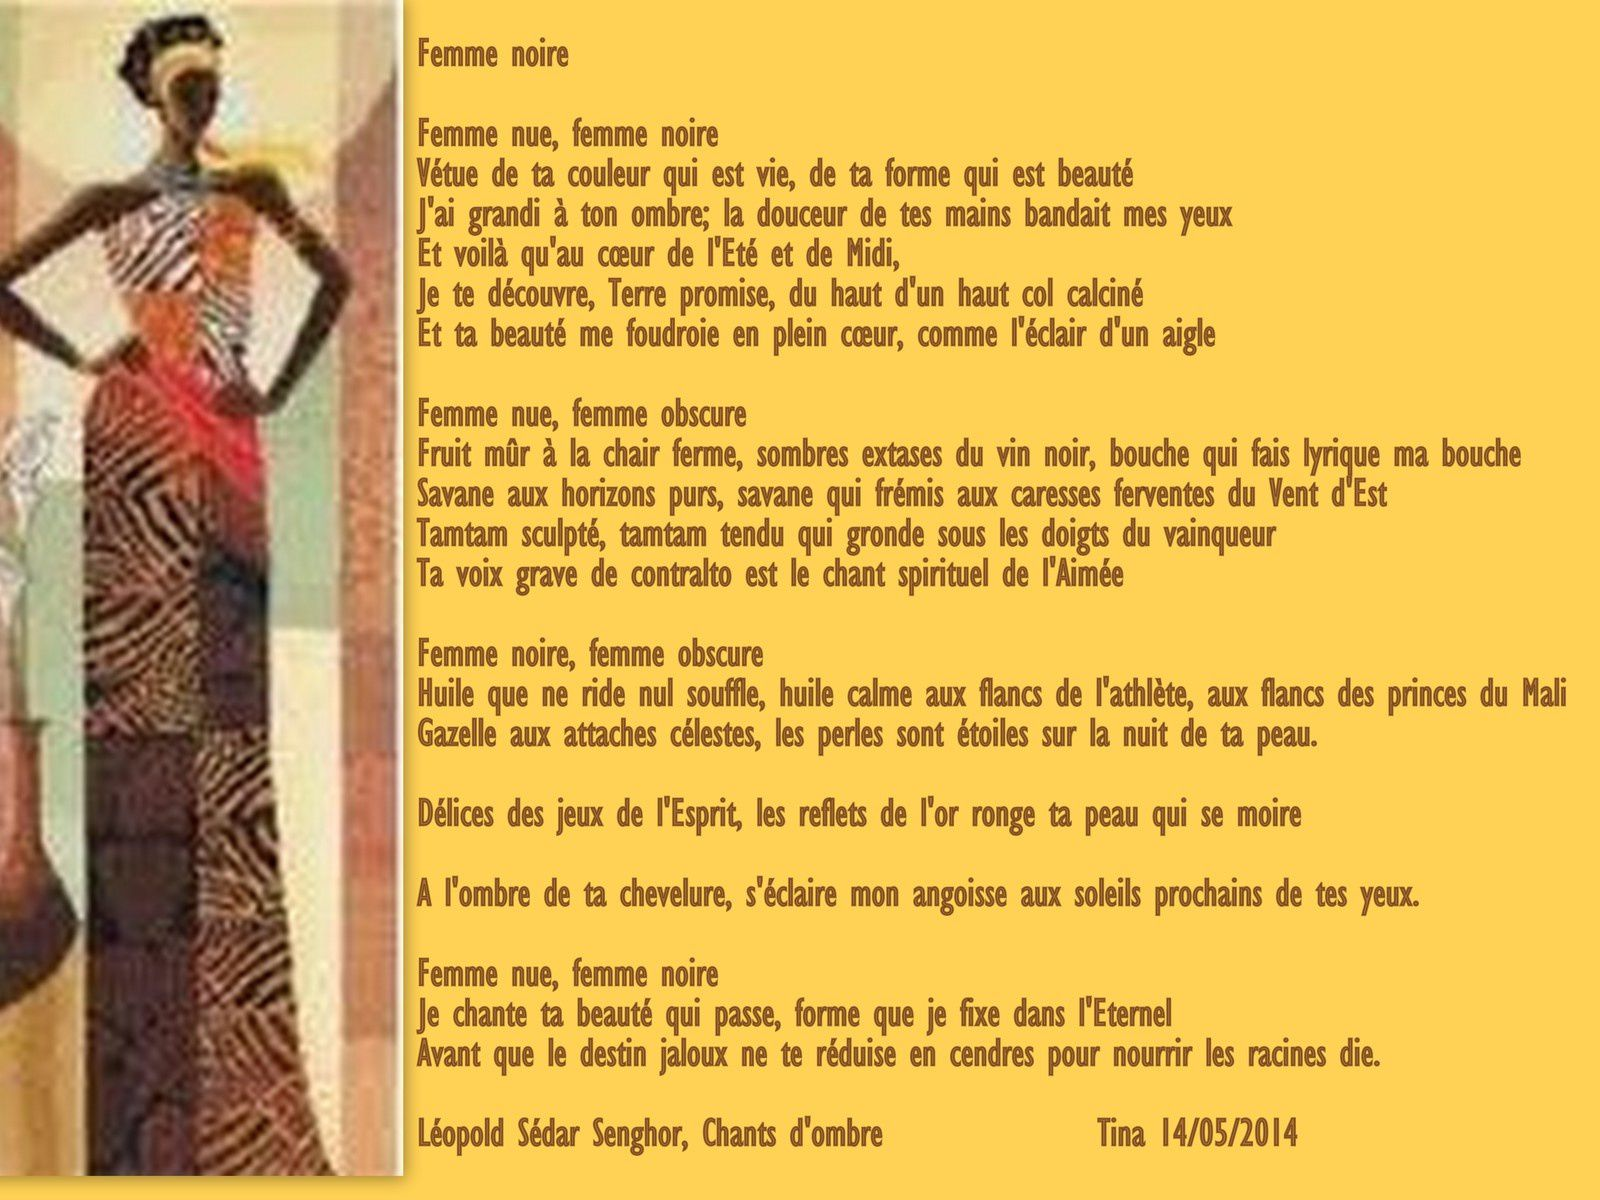

il y'a 16 rondes au niveau de l'algorithme DES et pour chaque ronde on utilise une clé différente.

Dans l'algorithme DES, les coefficients du 8ème bit de la clé ne sont pas utilisés, ce qui signifie que les bits 8, 16, 24, 32, 40, 48, 56, 64 ne sont pas pris en compte (la longueur effective de la clé est donc de 56 bits).

Le DES utilise un certains nombre de constantes [cliquer pour consulter](https://fr.wikipedia.org/wiki/Constantes_du_DES#Permuted_choice_1_(PC-1))

> Implémentation de l'algorithme:

In [16]:
# PERMUTATION INITIALE
IP = [58, 50, 42, 34, 26, 18, 10, 2,
      60, 52, 44, 36, 28, 20, 12, 4,
      62, 54, 46, 38, 30, 22, 14, 6,
      64, 56, 48, 40, 32, 24, 16, 8,
      57, 49, 41, 33, 25, 17, 9, 1,
      59, 51, 43, 35, 27, 19, 11, 3,
      61, 53, 45, 37, 29, 21, 13, 5,
      63, 55, 47, 39, 31, 23, 15, 7]

# EXPANSION
E = [32, 1 , 2 , 3 , 4 , 5 , 4 , 5,
     6 , 7 , 8 , 9 , 8 , 9 , 10, 11,
     12, 13, 12, 13, 14, 15, 16, 17,
     16, 17, 18, 19, 20, 21, 20, 21,
     22, 23, 24, 25, 24, 25, 26, 27,
     28, 29, 28, 29, 30, 31, 32, 1 ]

# PERMUTATION
P = [ 16,  7, 20, 21,
      29, 12, 28, 17,
      1, 15, 23, 26,
      5, 18, 31, 10,
      2,  8, 24, 14,
      32, 27,  3,  9,
      19, 13, 30,  6,
      22, 11,  4, 25 ]

# S-BOX: les 8 S BOITES DU DES
# S-box Table
sbox =  [[[14, 4, 13, 1, 2, 15, 11, 8, 3, 10, 6, 12, 5, 9, 0, 7],
          [ 0, 15, 7, 4, 14, 2, 13, 1, 10, 6, 12, 11, 9, 5, 3, 8],
          [ 4, 1, 14, 8, 13, 6, 2, 11, 15, 12, 9, 7, 3, 10, 5, 0],
          [15, 12, 8, 2, 4, 9, 1, 7, 5, 11, 3, 14, 10, 0, 6, 13 ]],
            
         [[15, 1, 8, 14, 6, 11, 3, 4, 9, 7, 2, 13, 12, 0, 5, 10],
            [3, 13, 4, 7, 15, 2, 8, 14, 12, 0, 1, 10, 6, 9, 11, 5],
            [0, 14, 7, 11, 10, 4, 13, 1, 5, 8, 12, 6, 9, 3, 2, 15],
           [13, 8, 10, 1, 3, 15, 4, 2, 11, 6, 7, 12, 0, 5, 14, 9 ]],
   
         [ [10, 0, 9, 14, 6, 3, 15, 5, 1, 13, 12, 7, 11, 4, 2, 8],
           [13, 7, 0, 9, 3, 4, 6, 10, 2, 8, 5, 14, 12, 11, 15, 1],
           [13, 6, 4, 9, 8, 15, 3, 0, 11, 1, 2, 12, 5, 10, 14, 7],
            [1, 10, 13, 0, 6, 9, 8, 7, 4, 15, 14, 3, 11, 5, 2, 12 ]],
       
          [ [7, 13, 14, 3, 0, 6, 9, 10, 1, 2, 8, 5, 11, 12, 4, 15],
           [13, 8, 11, 5, 6, 15, 0, 3, 4, 7, 2, 12, 1, 10, 14, 9],
           [10, 6, 9, 0, 12, 11, 7, 13, 15, 1, 3, 14, 5, 2, 8, 4],
            [3, 15, 0, 6, 10, 1, 13, 8, 9, 4, 5, 11, 12, 7, 2, 14] ],
        
          [ [2, 12, 4, 1, 7, 10, 11, 6, 8, 5, 3, 15, 13, 0, 14, 9],
           [14, 11, 2, 12, 4, 7, 13, 1, 5, 0, 15, 10, 3, 9, 8, 6],
            [4, 2, 1, 11, 10, 13, 7, 8, 15, 9, 12, 5, 6, 3, 0, 14],
           [11, 8, 12, 7, 1, 14, 2, 13, 6, 15, 0, 9, 10, 4, 5, 3 ]],
       
         [ [12, 1, 10, 15, 9, 2, 6, 8, 0, 13, 3, 4, 14, 7, 5, 11],
           [10, 15, 4, 2, 7, 12, 9, 5, 6, 1, 13, 14, 0, 11, 3, 8],
            [9, 14, 15, 5, 2, 8, 12, 3, 7, 0, 4, 10, 1, 13, 11, 6],
            [4, 3, 2, 12, 9, 5, 15, 10, 11, 14, 1, 7, 6, 0, 8, 13] ],
         
          [ [4, 11, 2, 14, 15, 0, 8, 13, 3, 12, 9, 7, 5, 10, 6, 1],
           [13, 0, 11, 7, 4, 9, 1, 10, 14, 3, 5, 12, 2, 15, 8, 6],
            [1, 4, 11, 13, 12, 3, 7, 14, 10, 15, 6, 8, 0, 5, 9, 2],
            [6, 11, 13, 8, 1, 4, 10, 7, 9, 5, 0, 15, 14, 2, 3, 12] ],
        
         [ [13, 2, 8, 4, 6, 15, 11, 1, 10, 9, 3, 14, 5, 0, 12, 7],
            [1, 15, 13, 8, 10, 3, 7, 4, 12, 5, 6, 11, 0, 14, 9, 2],
            [7, 11, 4, 1, 9, 12, 14, 2, 0, 6, 10, 13, 15, 3, 5, 8],
            [2, 1, 14, 7, 4, 10, 8, 13, 15, 12, 9, 0, 3, 5, 6, 11] ] ]


# PERMUTATION FINALE: IP-1
FP = [ 40, 8, 48, 16, 56, 24, 64, 32,
       39, 7, 47, 15, 55, 23, 63, 31,
       38, 6, 46, 14, 54, 22, 62, 30,
       37, 5, 45, 13, 53, 21, 61, 29,
       36, 4, 44, 12, 52, 20, 60, 28,
       35, 3, 43, 11, 51, 19, 59, 27,
       34, 2, 42, 10, 50, 18, 58, 26,
       33, 1, 41, 9, 49, 17, 57, 25 ]
# -----------------------GÉNÉRATION DES CLÉS
# PC-1 : 64 bits --> 56 bits
PC1 = [57, 49, 41, 33, 25, 17, 9,
        1, 58, 50, 42, 34, 26, 18,
        10, 2, 59, 51, 43, 35, 27,
        19, 11, 3, 60, 52, 44, 36,
        63, 55, 47, 39, 31, 23, 15,
        7, 62, 54, 46, 38, 30, 22,
        14, 6, 61, 53, 45, 37, 29,
        21, 13, 5, 28, 20, 12, 4 ]

# PC-2: 56 bits --> 48 bits
PC2 = [14, 17, 11, 24, 1, 5,
       3, 28, 15, 6, 21, 10,
       23, 19, 12, 4, 26, 8,
       16, 7, 27, 20, 13, 2,
       41, 52, 31, 37, 47, 55,
       30, 40, 51, 45, 33, 48,
       44, 49, 39, 56, 34, 53,
       46, 42, 50, 36, 29, 32 ]

# TABLE DE DÉCALAGE
shift_table = [1, 1, 2, 2,
                2, 2, 2, 2,
                1, 2, 2, 2,
                2, 2, 2, 1 ]

# fonctions utilitaires


In [17]:
# conversion hexadecimal en binaire
def hex2bin(s):
    mp = {'0' : "0000",
          '1' : "0001",
          '2' : "0010",
          '3' : "0011",
          '4' : "0100",
          '5' : "0101",
          '6' : "0110",
          '7' : "0111",
          '8' : "1000",
          '9' : "1001",
          'A' : "1010",
          'B' : "1011",
          'C' : "1100",
          'D' : "1101",
          'E' : "1110",
          'F' : "1111" }
    bin = ""
    for i in range(len(s)):
        bin = bin + mp[s[i].upper()]
    return bin


# conversion binaire en hexadecimal
def bin2hex(s):
    mp = {"0000" : '0',
          "0001" : '1',
          "0010" : '2',
          "0011" : '3',
          "0100" : '4',
          "0101" : '5',
          "0110" : '6',
          "0111" : '7',
          "1000" : '8',
          "1001" : '9',
          "1010" : 'A',
          "1011" : 'B',
          "1100" : 'C',
          "1101" : 'D',
          "1110" : 'E',
          "1111" : 'F' }
    hex = ""
    for i in range(0,len(s),4):
        ch = ""
        ch = ch + s[i]
        ch = ch + s[i + 1]
        ch = ch + s[i + 2]
        ch = ch + s[i + 3]
        hex = hex + mp[ch]
         
    return hex
 

# conversion binaire en decimal
def bin2dec(binary):
       
    binary1 = binary
    decimal, i, n = 0, 0, 0
    while(binary != 0):
        dec = binary % 10
        decimal = decimal + dec * pow(2, i)
        binary = binary//10
        i += 1
    return decimal
 

# conversion decimal en binaire
def dec2bin(num):
    res = bin(num).replace("0b", "")
    if(len(res)%4 != 0):
        div = len(res) / 4
        div = int(div)
        counter =(4 * (div + 1)) - len(res)
        for i in range(0, counter):
            res = '0' + res
    return res


# conversion texte en hexadecimal
def convertTextToHex(s):
  r = ""
  for c in s:
    r_i = format(ord(c), "x")
    if len(r_i) == 1:
      r_i = "0"+r_i
    r += r_i
  return r


# Conversion hexadecimal en texte  
def convertHexToText(h):
  s = ""
  for i in range(0, len(h), 2):
    s += chr(int(h[i:i+2], 16))
  return s


# chaines de caractères en binaire
def convertTextToBin(s):
  r = []
  for c in s:
    r.append(dec2bin(ord((c))))
  n = ''.join(r)
  if len(n)%64 != 0:
    q = len(n)%64
    l = (64 - q)//8
  
    s_ = " "*l
    for c_ in s_:
      r.append(dec2bin(ord((c_))))
 
  return ''.join(r)


def convertBinToText(s):
  r = ""
  if len(s) > 8:
    for i in range(8, len(s), 8):
      r_ = chr(bin2dec(s[i-8:i]))
      r += r_
    r += chr(bin2dec(s[len(s)-8:len(s)])) 
  else:
    r += chr(bin2dec(s[len(s)-8:len(s)])) 
  return r


# permutation
def permute(k, arr, n):
  permutation = ""
  for i in range(0, n):
      permutation = permutation + k[arr[i] - 1]

  return permutation


# decalage circulaire a gauche
def shift_left(k, nth_shifts):
    s = ""
    for i in range(nth_shifts):
        for j in range(1,len(k)):
            s = s + k[j]
        s = s + k[0]
        k = s
        s = ""
    return k   
  

# application du XOR
def xor(a, b):
    ans = ""
    for i in range(len(a)):
        if a[i] == b[i]:
            ans = ans + "0"
        else:
            ans = ans + "1"
    return ans

### Schéma d'une ronde de l'algorithme DES:

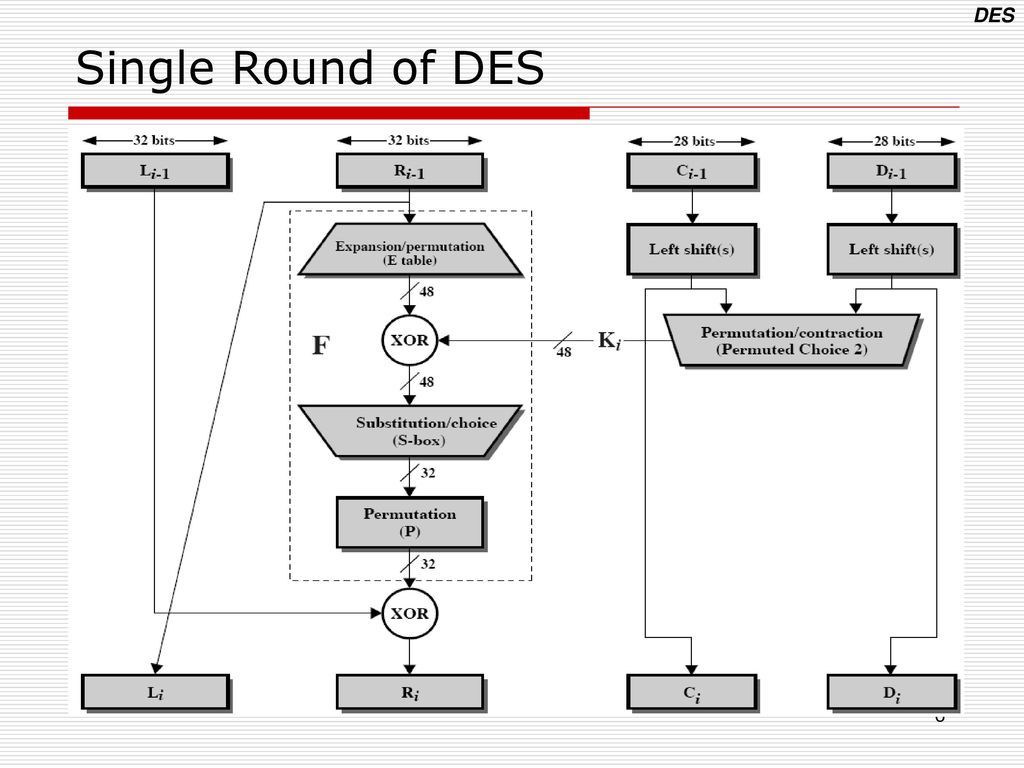

In [18]:
def encrypt(pt, rkb, rk):
    pt = hex2bin(pt)
    print("taille entrée: ", len(pt), "bits")

    # Permutation initiale
    pt = permute(pt, IP, 64)
    print("Après la permutation initiale", bin2hex(pt))
    
    # On separe en 2 blocs de 32
    left = pt[0:32]
    right = pt[32:64]
    
    for i in range(0, 16):
        #  E: expansion de 32 bits à 48 bits
        right_expanded = permute(right, E, 48)
        
        # XOR: ou exclusif entre le bloc étendu et la clé de la ronde (de taille 48 bits également)
        xor_x = xor(right_expanded, rkb[i])
       
        # S-boxes: calcul des 4 bits de sorties a partir des 6 bits d'entrées
        sbox_str = ""
        for j in range(0, 8):
            
            row = bin2dec(int(xor_x[j * 6] + xor_x[j * 6 + 5]))
            col = bin2dec(int(xor_x[j * 6 + 1] + xor_x[j * 6 + 2] + xor_x[j * 6 + 3] + xor_x[j * 6 + 4]))
            val = sbox[j][row][col]
            sbox_str = sbox_str + dec2bin(val)
            
        # P
        sbox_str = permute(sbox_str, P, 32)
        
        # XOR 
        result = xor(left, sbox_str)
        left = result
        
        # Echange
        if(i != 15):
            left, right = right, left
        print("Ronde ", i + 1, " gauche: ", bin2hex(left), " droite: ", bin2hex(right), " clé", rk[i])
    
    # Combinaison
    combine = left + right
    
    # Permutation finale
    cipher_text = permute(combine, FP, 64)
    return cipher_text

### Génération des 16 clés

In [19]:

key = "1FBF091827360C90" # une clé de taille 64 bits
key = hex2bin(key)
key = permute(key, PC1, 56)


# SEPARATION 
left = key[0:28]    
right = key[28:56]  
 
rkb = []
rk  = []

for i in range(0, 16):
    # decalage
    left = shift_left(left, shift_table[i])
    right = shift_left(right, shift_table[i])
     
    # Combinaison
    combine_str = left + right
     
    # Compression de la clé de 56 a 48 bits
    round_key = permute(combine_str, PC2, 48)
    print("clé tour: ", round_key)
    rkb.append(round_key)
    rk_i = bin2hex(round_key)
    print("clé tour en plaintext: ", rk_i)
    rk.append(rk_i)

clé tour:  000100010100010010000000011101101101011010011000
clé tour en plaintext:  11448076D698
clé tour:  010001000010100000001000100110101011110011011110
clé tour en plaintext:  4428089ABCDE
clé tour:  000000101010110000100000011011011101011110110101
clé tour en plaintext:  02AC206DD7B5
clé tour:  110010000010110000000010000110110110110011101011
clé tour en plaintext:  C82C021B6CEB
clé tour:  011000001010011000001000111011101101100100010101
clé tour en plaintext:  60A608EED915
clé tour:  010000001001010000000010100000110110011111111110
clé tour en plaintext:  4094028367FE
clé tour:  011000001000100001010010111111011001101110000001
clé tour en plaintext:  608852FD9B81
clé tour:  001001001110000000000010110100100100011001111111
clé tour en plaintext:  24E002D2467F
clé tour:  100001000001001101000100111100011101110111000110
clé tour en plaintext:  841344F1DDC6
clé tour:  000000100101001001000001000011001010011010111111
clé tour en plaintext:  0252410CA6BF
clé tour:  0000100101010001011

In [20]:
text = """
Femme nue, femme noire
Vêtue de ta couleur qui est vie, de ta forme qui est beauté
J'ai grandi à ton ombre; la douceur de tes mains bandait mes yeux
Et voilà qu’au coeur de l'Été et de Midi,
Je te découvre, Terre promise, du haut d’un haut col calciné
Et ta beauté me foudroie en plein coeur, comme l’éclair d’un aigle

Femme nue, femme obscure
Fruit mûr à la chair ferme, sombres extases du vin noir, bouche qui fais lyrique ma bouche
Savane aux horizons purs, savane qui frémis aux caresses ferventes du Vent d’Est
Tamtam sculpté, tamtam tendu qui gronde sous les doigts du vainqueur
Ta voix grave de contralto est le chant spirituel de l’Aimée

Femme noire, femme obscure
Huile que ne ride nul souffle, huile calme aux flancs de l’athlète, aux flancs des princes du Mali
Gazelle aux attaches célestes, les perles sont étoiles sur la nuit de ta peau.
Délices des jeux de l’Esprit, les reflets de l’or rouge sur ta peau qui se moire
A l’ombre de ta chevelure, s’éclaire mon angoisse aux soleils prochains de tes yeux.

Femme nue, femme noire
Je chante ta beauté qui passe, forme que je fixe dans l’Éternel
Avant que le destin jaloux ne te réduise en cendres pour nourrir les racines de la vie.
"""
text = text.replace("’", "'")
text

"\nFemme nue, femme noire\nVêtue de ta couleur qui est vie, de ta forme qui est beauté\nJ'ai grandi à ton ombre; la douceur de tes mains bandait mes yeux\nEt voilà qu'au coeur de l'Été et de Midi,\nJe te découvre, Terre promise, du haut d'un haut col calciné\nEt ta beauté me foudroie en plein coeur, comme l'éclair d'un aigle\n\nFemme nue, femme obscure\nFruit mûr à la chair ferme, sombres extases du vin noir, bouche qui fais lyrique ma bouche\nSavane aux horizons purs, savane qui frémis aux caresses ferventes du Vent d'Est\nTamtam sculpté, tamtam tendu qui gronde sous les doigts du vainqueur\nTa voix grave de contralto est le chant spirituel de l'Aimée\n\nFemme noire, femme obscure\nHuile que ne ride nul souffle, huile calme aux flancs de l'athlète, aux flancs des princes du Mali\nGazelle aux attaches célestes, les perles sont étoiles sur la nuit de ta peau.\nDélices des jeux de l'Esprit, les reflets de l'or rouge sur ta peau qui se moire\nA l'ombre de ta chevelure, s'éclaire mon angoi

In [21]:

texte_chiffre = ""
for i in range(0, len(text), 8):
  t_i = text[i:i+8]
  if len(t_i) != 8:
    r = 8 - len(t_i)
    t_i = t_i + " "*r
  sub_text = convertTextToHex(t_i)
  print(sub_text)
  print("début Chiffrement du texte ....")
  texte_chiffre += bin2hex(encrypt(sub_text, rkb, rk))
texte_chiffre_clair = convertHexToText(texte_chiffre)
print("Chiffrement terminé avec succés!!")
print()
print("-"*64)
print("-"*25+"TEXTE CHIFFRÉ"+"-"*25)
print("-"*64)
print(texte_chiffre_clair)

0a46656d6d65206e
début Chiffrement du texte ....
taille entrée:  64 bits
Après la permutation initiale BE00BE3C00FC9983
Ronde  1  gauche:  00FC9983  droite:  ACA740D8  clé 11448076D698
Ronde  2  gauche:  ACA740D8  droite:  98205124  clé 4428089ABCDE
Ronde  3  gauche:  98205124  droite:  9EF3EAB4  clé 02AC206DD7B5
Ronde  4  gauche:  9EF3EAB4  droite:  9A9EB327  clé C82C021B6CEB
Ronde  5  gauche:  9A9EB327  droite:  0E6ABA3E  clé 60A608EED915
Ronde  6  gauche:  0E6ABA3E  droite:  BD0DC063  clé 4094028367FE
Ronde  7  gauche:  BD0DC063  droite:  0F362918  clé 608852FD9B81
Ronde  8  gauche:  0F362918  droite:  2B319383  clé 24E002D2467F
Ronde  9  gauche:  2B319383  droite:  51EA94B2  clé 841344F1DDC6
Ronde  10  gauche:  51EA94B2  droite:  439F31F4  clé 0252410CA6BF
Ronde  11  gauche:  439F31F4  droite:  BB0B6760  clé 095160FF7CC5
Ronde  12  gauche:  BB0B6760  droite:  F435BE3D  clé 8041C92AC3FB
Ronde  13  gauche:  F435BE3D  droite:  4DFF4D0C  clé 11430197FD07
Ronde  14  gauche:  4DFF4D0C  d

In [22]:
print("Début déchiffrment ...")
rkb_rev = rkb[::-1]
rk_rev = rk[::-1]
texte_clair_hex = ""
for i in range(0, len(texte_chiffre), 16):
  sub_text_chiffre = texte_chiffre[i:i+16]
  texte_clair_hex += bin2hex(encrypt(sub_text_chiffre, rkb_rev, rk_rev))
texte_clair = convertHexToText(texte_clair_hex)
print("-"*64)
print("-"*25+"TEXTE DÉCHIFFRÉ"+"-"*24)
print("-"*64)
print("Texte original: ",texte_clair)

Début déchiffrment ...
taille entrée:  64 bits
Après la permutation initiale 70ADCB298CFB7FA2
Ronde  1  gauche:  8CFB7FA2  droite:  8CF84175  clé 080C1C658F6D
Ronde  2  gauche:  8CF84175  droite:  4DFF4D0C  clé 1120C5D9EB4F
Ronde  3  gauche:  4DFF4D0C  droite:  F435BE3D  clé 011981EE07F0
Ronde  4  gauche:  F435BE3D  droite:  BB0B6760  clé 11430197FD07
Ronde  5  gauche:  BB0B6760  droite:  439F31F4  clé 8041C92AC3FB
Ronde  6  gauche:  439F31F4  droite:  51EA94B2  clé 095160FF7CC5
Ronde  7  gauche:  51EA94B2  droite:  2B319383  clé 0252410CA6BF
Ronde  8  gauche:  2B319383  droite:  0F362918  clé 841344F1DDC6
Ronde  9  gauche:  0F362918  droite:  BD0DC063  clé 24E002D2467F
Ronde  10  gauche:  BD0DC063  droite:  0E6ABA3E  clé 608852FD9B81
Ronde  11  gauche:  0E6ABA3E  droite:  9A9EB327  clé 4094028367FE
Ronde  12  gauche:  9A9EB327  droite:  9EF3EAB4  clé 60A608EED915
Ronde  13  gauche:  9EF3EAB4  droite:  98205124  clé C82C021B6CEB
Ronde  14  gauche:  98205124  droite:  ACA740D8  clé 02AC

# AES: Advanced Encryption Standard

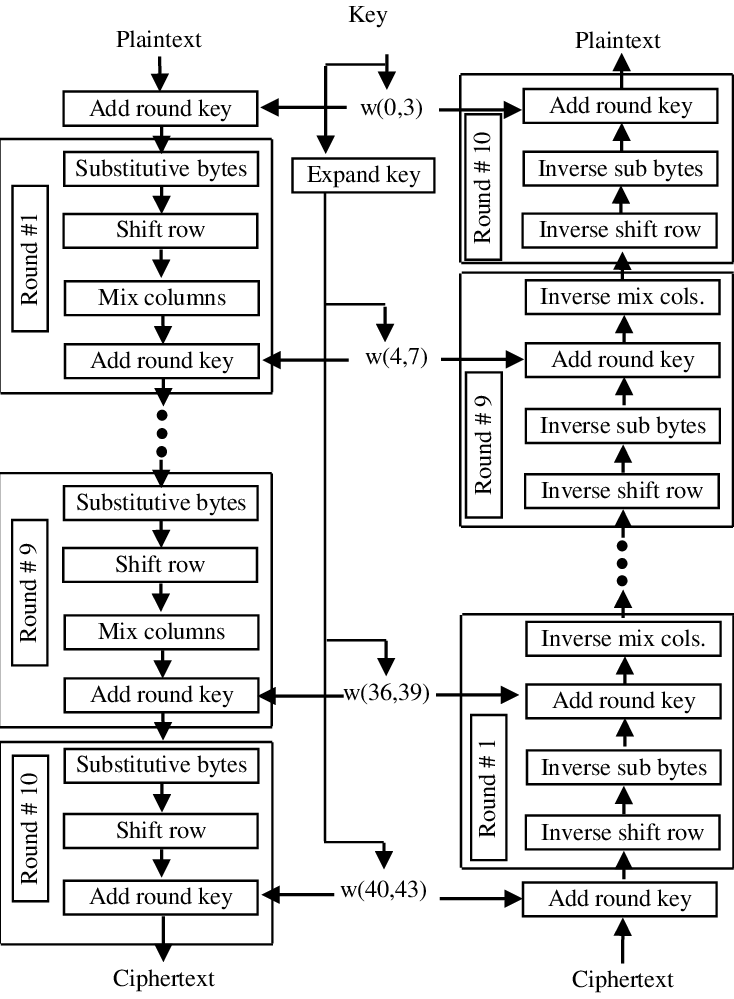

Pour mettre en evidence l'efficacité de l'algorithme AES nous allons utilisé la bibliothéque pycryptodome 

In [23]:
!pip install pycryptodome

In [24]:
from Crypto.Cipher import AES

In [25]:
import hashlib
from Crypto import Random
import binascii, os

def encrypt_AES(msg, secretKey):
    aesCipher = AES.new(secretKey, AES.MODE_GCM)
    ciphertext, authTag = aesCipher.encrypt_and_digest(msg)
    return (ciphertext, aesCipher.nonce, authTag)

def decrypt_AES(encryptedMsg, secretKey):
    (ciphertext, nonce, authTag) = encryptedMsg
    aesCipher = AES.new(secretKey, AES.MODE_GCM, nonce)
    plaintext = aesCipher.decrypt_and_verify(ciphertext, authTag)
    return plaintext

secretKey = os.urandom(32)

In [26]:
print("Encryption key:", binascii.hexlify(secretKey))

Encryption key: b'923a5393f8e18fad04a33d1430c5eed72653268d8eeea4ddf143d6d5113615cd'


In [27]:
text = """
Femme nue, femme noire
Vêtue de ta couleur qui est vie, de ta forme qui est beauté
J'ai grandi à ton ombre; la douceur de tes mains bandait mes yeux
Et voilà qu’au coeur de l'Été et de Midi,
Je te découvre, Terre promise, du haut d’un haut col calciné
Et ta beauté me foudroie en plein coeur, comme l’éclair d’un aigle

Femme nue, femme obscure
Fruit mûr à la chair ferme, sombres extases du vin noir, bouche qui fais lyrique ma bouche
Savane aux horizons purs, savane qui frémis aux caresses ferventes du Vent d’Est
Tamtam sculpté, tamtam tendu qui gronde sous les doigts du vainqueur
Ta voix grave de contralto est le chant spirituel de l’Aimée

Femme noire, femme obscure
Huile que ne ride nul souffle, huile calme aux flancs de l’athlète, aux flancs des princes du Mali
Gazelle aux attaches célestes, les perles sont étoiles sur la nuit de ta peau.
Délices des jeux de l’Esprit, les reflets de l’or rouge sur ta peau qui se moire
A l’ombre de ta chevelure, s’éclaire mon angoisse aux soleils prochains de tes yeux.

Femme nue, femme noire
Je chante ta beauté qui passe, forme que je fixe dans l’Éternel
Avant que le destin jaloux ne te réduise en cendres pour nourrir les racines de la vie.
"""
text = text.replace("’", "'")



In [28]:
texte_b = text.encode("utf-8")

In [29]:
encryptedMsg = encrypt_AES(texte_b, secretKey)

texte_chiffre_hex = binascii.hexlify(encryptedMsg[0])
print("-"*64,"texte crypté:")
print('*'*128)
print('*'*128)
print('*'*128)
print(convertHexToText(texte_chiffre_hex))

---------------------------------------------------------------- texte crypté:
********************************************************************************************************************************
********************************************************************************************************************************
********************************************************************************************************************************
³,s ¿­Û\}»j}K´®N;õáYìP`5:Ò*Ã`äm:Ä*Ð¹/A«k¶6án¨Mo6µ®Ôe»Ü¡½ÉeJìãÉ GYÞ¸?#1A8jº3@aÔ¼éf¹ã|*þ\QiñECL½âS:ôð`ÎBéóy*¢×Ø/ÒE¨,«OQÎÅ:OÄ¬Ü4äÂ-ô£°å"ÁCâKþÇ®d³#Ñ<°õsñ	äøa2¼åð¾ÿ`Í}xÝ:Çêb þþJuTúUÉw'eüì{TK4C¹0Pè+ëøRÅlÊ72[ÄÍ|ÌèZ\°Ï4Åg`-[ Ç±^¨	þ´ÂÃªÀw¯Ò4®ôÓU?Éîþ=ç<1# qF2OB"C"Oï`ÌDÐþ9çñ2(­DÆ¢MÑéäKÚAáµS¤º³TÃøµ_ãÿßÃvWhjô
[9ÒÒss§pÔjhÜ¸'øQõU a1«`EÕ­D[âZÐ®³Ó]NâÃÉ3M#é,úÄÚÈ
áïâK.ÍmÎ2|,xÙ¶KEÿ¹83Ô½Ó{A¶DQ¸¼¾;jb_Ç"ïð®[½þÕ°§á
P{mÐ3Ó>Õß6¼Ôæ

In [30]:
decryptedMsg = decrypt_AES(encryptedMsg, secretKey)
print("-"*64,"texte décrypté:")
print('*'*128)
print('*'*128)
print('*'*128)
print(decryptedMsg.decode("utf-8"))

---------------------------------------------------------------- texte décrypté:
********************************************************************************************************************************
********************************************************************************************************************************
********************************************************************************************************************************

Femme nue, femme noire
Vêtue de ta couleur qui est vie, de ta forme qui est beauté
J'ai grandi à ton ombre; la douceur de tes mains bandait mes yeux
Et voilà qu'au coeur de l'Été et de Midi,
Je te découvre, Terre promise, du haut d'un haut col calciné
Et ta beauté me foudroie en plein coeur, comme l'éclair d'un aigle

Femme nue, femme obscure
Fruit mûr à la chair ferme, sombres extases du vin noir, bouche qui fais lyrique ma bouche
Savane aux horizons purs, savane qui frémis aux caresses ferventes du Vent d'Est
Tamtam sculpté